# Install Dependency

In [ ]:
!pip install fiftyone
!pip install fiftyone-db-ubuntu2204

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 21.7 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py

--2023-11-30 13:06:06--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘transforms.py’

transforms.py       100%[===================>]  23.07K  --.-KB/s    in 0.002s  

2023-11-30 13:06:06 (10.3 MB/s) - ‘transforms.py’ saved [23628/23628]

--2023-11-30 13:06:06--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4063 (4.0K)

# Import Library

In [ ]:
import torchvision
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import os
import random
from PIL import Image, ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.io import read_image, ImageReadMode

from torch.utils.data import DataLoader

import cv2
import utils
import fiftyone as fo
import fiftyone.zoo as foz

from engine import train_one_epoch, evaluate

Migrating database to v0.22.3


INFO:fiftyone.migrations.runner:Migrating database to v0.22.3


# Download Data

In [ ]:
# Load the COCO-2017 dataset
# This will download it from the FiftyOne Dataset Zoo if necessary
dataset = foz.load_zoo_dataset("coco-2017", split="train", label_types=["detections"], classes=["person"], max_samples=3000, seed=43)
# Print summary information about the view
# print(dataset)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [7.1s elapsed, 0s remaining, 300.4Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [7.1s elapsed, 0s remaining, 300.4Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 3000 images


 100% |████████████████| 3000/3000 [13.6m elapsed, 0s remaining, 3.8 images/s]      


INFO:eta.core.utils: 100% |████████████████| 3000/3000 [13.6m elapsed, 0s remaining, 3.8 images/s]      


Writing annotations for 3000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 3000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████| 3000/3000 [25.4s elapsed, 0s remaining, 106.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 3000/3000 [25.4s elapsed, 0s remaining, 106.5 samples/s]      


Dataset 'coco-2017-train-3000' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-3000' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 500 images


 100% |██████████████████| 500/500 [2.3m elapsed, 0s remaining, 3.5 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 500/500 [2.3m elapsed, 0s remaining, 3.5 images/s]      


Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [3.1s elapsed, 0s remaining, 159.5 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [3.1s elapsed, 0s remaining, 159.5 samples/s]      


Dataset 'coco-2017-validation-500' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-500' created


Name:        coco-2017-train-3000
Media type:  image
Num samples: 3000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
dataset_test = foz.load_zoo_dataset("coco-2017", split="validation", label_types=["detections"], classes=["person"], max_samples=500, seed=43)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 690.0Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.5s elapsed, 0s remaining, 690.0Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 500 images


 100% |██████████████████| 500/500 [50.1s elapsed, 0s remaining, 10.2 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 500/500 [50.1s elapsed, 0s remaining, 10.2 images/s]      


Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [3.4s elapsed, 0s remaining, 135.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [3.4s elapsed, 0s remaining, 135.1 samples/s]      


Dataset 'coco-2017-validation-500' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-500' created


In [ ]:
# Iterate over the dataset
for sample in dataset:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [ ]:
# Iterate over the dataset_test
for sample in dataset_test:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [ ]:
transform = T.Compose([
    T.ToPILImage(),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transforms, root):
        self.dataset = dataset
        self.transforms = transforms
        self.root = root
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "data"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "data", self.imgs[idx])
        img = read_image(img_path, mode=ImageReadMode.RGB )

        view = self.dataset.view()
        sample = view[img_path]

        # get bounding box coordinates for each detection
        width = sample.metadata.width
        height = sample.metadata.height
        boxes = []
        for d in sample.ground_truth.detections:
            x,y,w,h = d.bounding_box
            x1 = x * width
            y1 = y * height
            x2 = x1 + (w * width)
            y2 = y1 + (h * height)
            boxes.append([x1, y1, x2, y2])

        boxes = torch.tensor(boxes);

        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        num_objs = len(sample.ground_truth.detections)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        image_id = idx
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        # img = tv_tensors.Image(img)

        target = {}
        target["boxes"] = boxes
        # target["masks"] = None
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return (img, target)

    def __len__(self):
        return len(self.imgs)

In [ ]:

train_data_dir = '/root/fiftyone/coco-2017/train'

train_dataset = CustomDataset(root=train_data_dir, dataset=dataset, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=utils.collate_fn)

In [ ]:
test_data_dir = '/root/fiftyone/coco-2017/validation'

test_dataset = CustomDataset(root=test_data_dir, dataset=dataset_test, transforms=transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=utils.collate_fn)

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
num_class = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_class)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 96.2MB/s]


In [ ]:

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

num_epochs = 5

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, test_loader, device=device)

print("That's it!")

Epoch: [0]  [  0/750]  eta: 1:58:56  lr: 0.000012  loss: 0.8808 (0.8808)  loss_classifier: 0.6895 (0.6895)  loss_box_reg: 0.1592 (0.1592)  loss_objectness: 0.0145 (0.0145)  loss_rpn_box_reg: 0.0177 (0.0177)  time: 9.5156  data: 0.0712  max mem: 6642
Epoch: [0]  [ 10/750]  eta: 0:24:45  lr: 0.000078  loss: 0.8958 (0.9745)  loss_classifier: 0.6413 (0.5860)  loss_box_reg: 0.2802 (0.2912)  loss_objectness: 0.0564 (0.0754)  loss_rpn_box_reg: 0.0241 (0.0218)  time: 2.0074  data: 0.0538  max mem: 6796
Epoch: [0]  [ 20/750]  eta: 0:20:17  lr: 0.000145  loss: 0.8623 (0.8898)  loss_classifier: 0.3726 (0.4411)  loss_box_reg: 0.3122 (0.3034)  loss_objectness: 0.0557 (0.1114)  loss_rpn_box_reg: 0.0241 (0.0338)  time: 1.2754  data: 0.0507  max mem: 7459
Epoch: [0]  [ 30/750]  eta: 0:18:19  lr: 0.000212  loss: 0.7219 (0.8412)  loss_classifier: 0.2777 (0.3883)  loss_box_reg: 0.3310 (0.3126)  loss_objectness: 0.0557 (0.1043)  loss_rpn_box_reg: 0.0261 (0.0360)  time: 1.2630  data: 0.0482  max mem: 7459


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/CV Bootcamp/Project-2/fastrcnn_model_3000.pt')

In [ ]:
transform1 = T.Compose([
    T.ToPILImage(),
    T.ToTensor(),
])

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/CV Bootcamp/Project-2/fastrcnn_model_3000.pt"))
model.eval()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
view = dataset_test.view()
samples = view.take(6)

In [ ]:
transform1 = T.Compose([
    T.ToPILImage(),
    T.ToTensor(),
])

In [ ]:
sample = samples.first()
sample

<SampleView: {
    'id': '6568891e605c2da0eb8bff11',
    'media_type': 'image',
    'filepath': '/root/fiftyone/coco-2017/validation/data/000000082812.jpg',
    'tags': ['validation'],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 640,
        'height': 360,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '6568891e605c2da0eb8bfedc',
                'attributes': {},
                'tags': [],
                'label': 'person',
                'bounding_box': [
                    0.5421875,
                    0.6335277777777778,
                    0.116328125,
                    0.36647222222222225,
                ],
                'mask': None,
                'confidence': None,
                'index': None,
                'supercategory': 'person',
                'iscrowd': 0,
            }>,
            <Detection: {
 

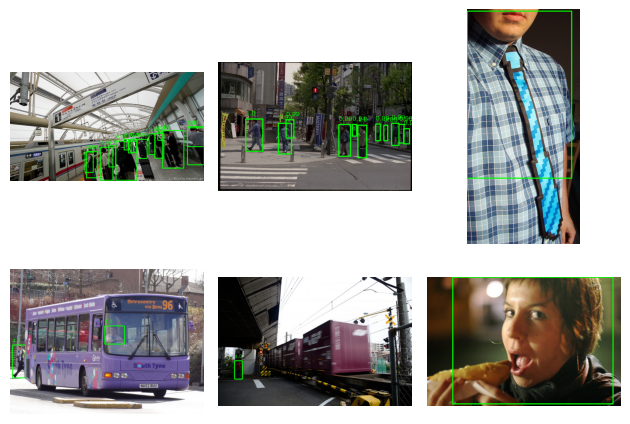

In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX

for i, sample in enumerate(samples):
  plt.subplot(2, 3, i+1)
  img = read_image(sample.filepath, mode=ImageReadMode.RGB )
  img = transform1(img).to(device)
  with torch.no_grad():
    pred = model([img])

  bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
  num = torch.argwhere(scores > 0.8).shape[0]

  igg = cv2.imread(sample.filepath)
  igg = cv2.cvtColor(igg, cv2.COLOR_BGR2RGB)
  for i in range(num):
    x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
    igg = cv2.putText(igg, str(np.round(scores[i].to('cpu').numpy(), 2)), (x1, y1-10), font, 0.5, (0,255,0))
    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 2)

  # plt.title(sample.id)
  plt.imshow(igg)
  plt.axis('off')

# fig = plt.figure(figsize=(30,30))
plt.tight_layout()
plt.show()
  # cv2_imshow(igg)

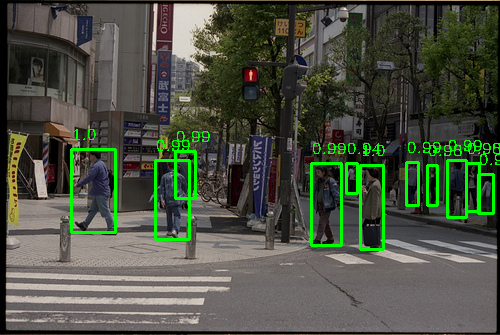

In [ ]:
sample = samples.skip(1).first()
img = read_image(sample.filepath, mode=ImageReadMode.RGB )
img = transform1(img).to(device)
with torch.no_grad():
  pred = model([img])

bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
num = torch.argwhere(scores > 0.8).shape[0]

igg = cv2.imread(sample.filepath)
# igg = cv2.cvtColor(igg, cv2.COLOR_BGR2RGB)
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
  igg = cv2.putText(igg, str(np.round(scores[i].to('cpu').numpy(), 2)), (x1, y1-10), font, 0.5, (0,255,0))
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(igg)

In [ ]:
import time
# Measure Inference Time

sample = samples.skip(1).first()
img = read_image(sample.filepath, mode=ImageReadMode.RGB )
img = transform1(img).to(device)

# Perform a warm-up run (optional but can be useful for more accurate timing)
with torch.no_grad():
    _ = model([img])

# Measure inference time
with torch.no_grad():
    start_time = time.time()
    output = model([img])
    end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time: {inference_time} seconds")

Inference time: 0.1434340476989746 seconds


In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX

cap = cv2.VideoCapture('single.mp4')
# cap = cv2.VideoCapture(0)
# used to record the time when we processed last frame
prev_frame_time = 0

# used to record the time at which we processed current frame
new_frame_time = 0
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    img = transform1(frame).to(device)
    with torch.no_grad():
        pred = model([img])

    bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
    num = torch.argwhere(scores > 0.8).shape[0]


    for i in range(num):
      x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
      frame = cv2.putText(frame, str(np.round(scores[i].to('cpu').numpy(), 2)), (x1, y1-10), font, 0.5, (0,255,0))
      frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    new_frame_time = time.time()

    # Calculating the fps

    # fps will be number of frame processed in given time frame
    # since their will be most of time error of 0.001 second
    # we will be subtracting it to get more accurate result
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time

    # converting the fps into integer
    fps = int(fps)

    # converting the fps to string so that we can display it on frame
    # by using putText function
    fps = str(fps)

    cv2_imshow('Fast RCNN', frame)

    print(f"FPS: {fps}")

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Get Precision
# Choose a random subset of 100 samples to add predictions to
predictions_view = dataset_test.view()

In [ ]:
classes = dataset_test.default_classes
classes = ['0', 'person']

In [ ]:
from torchvision.transforms import functional as func

with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        # image = Image.open(sample.filepath)
        # image = func.to_tensor(image).to(device)
        image = read_image(sample.filepath, mode=ImageReadMode.RGB )
        image = transform1(image).to(device)
        c, h, w = image.shape

        # Perform inference
        with torch.no_grad():
          preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |█████████████████| 500/500 [1.2m elapsed, 0s remaining, 7.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [1.2m elapsed, 0s remaining, 7.3 samples/s]      


Finished adding predictions


In [ ]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", F("confidence") > 0.75, only_matches=False)

In [ ]:
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 500/500 [10.2s elapsed, 0s remaining, 32.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [10.2s elapsed, 0s remaining, 32.8 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 500/500 [6.5s elapsed, 0s remaining, 108.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [6.5s elapsed, 0s remaining, 108.1 samples/s]      


In [ ]:
counts = dataset_test.count_values("ground_truth.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

In [ ]:
results.print_report(classes=classes_top10)

              precision    recall  f1-score   support

      person       0.89      0.71      0.79      2288

   micro avg       0.89      0.71      0.79      2288
   macro avg       0.89      0.71      0.79      2288
weighted avg       0.89      0.71      0.79      2288

